In [1]:
import pandas as pd

In [2]:
ls

Untitled.ipynb           new_script.js            style.css
data_clean.csv           reddit-april-fools.html


In [5]:
data = pd.read_csv("data_clean.csv")

In [35]:
intervals = [60*x for x in range(26)]
labels = ['12am','1am','2am','3am','4am','5am','6am',
         '7am','8am','9am','10am','11am','12pm','1pm',
         '2pm','3pm','4pm','5pm','6pm','7pm','8pm',
         '9pm','10pm','11pm','12am(2)']

In [36]:
len(intervals)

26

In [37]:
len(labels)

25

In [43]:
cuts = pd.cut(data['time'], bins=intervals,right=True, labels=labels)

In [44]:
cuts

0           12am
1           12am
2           12am
3           12am
4           12am
5           12am
6           12am
7           12am
8           12am
9           12am
10          12am
11          12am
12          12am
13          12am
14          12am
15          12am
16          12am
17          12am
18          12am
19          12am
20          12am
21          12am
22          12am
23          12am
24          12am
25          12am
26          12am
27          12am
28          12am
29          12am
          ...   
12853    12am(2)
12854    12am(2)
12855    12am(2)
12856    12am(2)
12857    12am(2)
12858    12am(2)
12859    12am(2)
12860    12am(2)
12861    12am(2)
12862    12am(2)
12863    12am(2)
12864    12am(2)
12865    12am(2)
12866    12am(2)
12867    12am(2)
12868    12am(2)
12869    12am(2)
12870    12am(2)
12871    12am(2)
12872    12am(2)
12873    12am(2)
12874       12am
12875    12am(2)
12876    12am(2)
12877    12am(2)
12878    12am(2)
12879    12am(2)
12880       12

In [50]:
cuts.value_counts().sort_index().to_csv("time_frequency.csv")

In [56]:
data=data[['is_original_post','time_categories']]
data.head()

,is_original_post,time_categories
0,True,12am
1,True,12am
2,True,12am
3,False,12am
4,False,12am


In [62]:
data['is_original_post'] = data['is_original_post'].replace('1','True')

In [66]:
data_grouped = data.groupby(['is_original_post','time_categories']).agg('size').reset_index().rename(columns={0:'po`bsts'})

In [68]:
data_grouped.head()

,is_original_post,time_categories,posts
0,False,12am,469
1,False,1am,434
2,False,2am,359
3,False,3am,446
4,False,4am,301


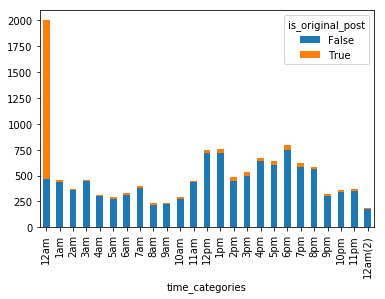

In [71]:
data_grouped.pivot(index='time_categories',columns='is_original_post',values='posts').plot.bar(stacked=True)

In [72]:
data_grouped

,is_original_post,time_categories,posts
0,False,12am,469
1,False,1am,434
2,False,2am,359
3,False,3am,446
4,False,4am,301
5,False,5am,277
6,False,6am,315
7,False,7am,384
8,False,8am,220
9,False,9am,229
